In [164]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# import training data
dft_eng = pd.read_csv('../data/dft_eng.csv')
dft_jap = pd.read_csv('../data/dft_jap.csv')
dft_fin = pd.read_csv('../data/dft_fin.csv')

# import validation data
dfv_eng = pd.read_csv('../data/dfv_eng.csv')
dfv_jap = pd.read_csv('../data/dfv_jap.csv')
dfv_fin = pd.read_csv('../data/dfv_fin.csv')

#import word count
word_count = pd.read_csv('../data/question_word_count.csv')

In [175]:
stop_words = ['\n',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'did',
 'do',
 'does',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 's',
 'same',
 'she',
 'should',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 '{',
 '|',
 '}',
 '~']

In [5]:
def ans_freq(que, doc):

    freq = [x for x in que if x in doc]
    freq = len(freq)/len(que)
    return freq

In [6]:
# calculating frequenzy of words in answer that are in text 
for df in [dft_jap,dfv_jap,dft_eng,dfv_eng,dft_fin,dfv_fin]:
    frequency = []
    for question, answer in zip(df['question_text_tokenized'], df['document_plaintext_tokenized']):
        frequency.append(ans_freq(eval(question), eval(answer)))

    df['word_frequency_score'] = frequency

In [7]:
dft_eng

,question_text,document_title,language,annotations,document_plaintext,document_url,answer_start,answer_text,question_text_tokenized,document_plaintext_tokenized,answer_text_tokenized,labels,word_frequency_score
0,When was quantum field theory developed?,Quantum field theory,english,"{'answer_start': array([159]), 'answer_text': ...",Quantum field theory naturally began with the ...,https://en.wikipedia.org/wiki/Quantum%20field%...,[159],['1920s'],"['when', 'was', 'quantum', 'field', 'theory', ...","['quantum', 'field', 'theory', 'naturally', 'b...",['1920s'],1,0.571429
1,Who was the first Nobel prize winner for Liter...,List of Nobel laureates in Literature,english,"{'answer_start': array([610]), 'answer_text': ...",The Nobel Prize in Literature (Swedish: Nobelp...,https://en.wikipedia.org/wiki/List%20of%20Nobe...,[610],['Sully Prudhomme'],"['who', 'was', 'the', 'first', 'nobel', 'prize...","['the', 'nobel', 'prize', 'in', 'literature', ...","['sully', 'prudhomme']",1,0.700000
2,When is the dialectical method used?,Dialectic,english,"{'answer_start': array([129]), 'answer_text': ...","Dialectic or dialectics (Greek: διαλεκτική, di...",https://en.wikipedia.org/wiki/Dialectic,[129],['discourse between two or more people holding...,"['when', 'is', 'the', 'dialectical', 'method',...","['dialectic', 'or', 'dialectics', '(', 'greek'...","['discourse', 'between', 'two', 'or', 'more', ...",1,0.571429
3,Who invented Hangul?,Origin of Hangul,english,"{'answer_start': array([88]), 'answer_text': a...",Hangul was personally created and promulgated ...,https://en.wikipedia.org/wiki/Origin%20of%20Ha...,[88],['Sejong the Great'],"['who', 'invented', 'hangul', '?']","['hangul', 'was', 'personally', 'created', 'an...","['sejong', 'the', 'great']",1,0.250000
4,What do Grasshoppers eat?,Grasshopper,english,"{'answer_start': array([0]), 'answer_text': ar...","Grasshoppers are plant-eaters, with a few spec...",https://en.wikipedia.org/wiki/Grasshopper,[0],"['Grasshoppers are plant-eaters, with a few sp...","['what', 'do', 'grasshoppers', 'eat', '?']","['grasshoppers', 'are', 'plant-eaters', ',', '...","['grasshoppers', 'are', 'plant-eaters', ',', '...",1,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,What was Neil Brooks' fastest recorded time?,Swimming at the 1980 Summer Olympics – Men's 4...,english,"{'answer_start': array([-1]), 'answer_text': a...",The medley relay was scheduled in the Olympisk...,https://en.wikipedia.org/wiki/Swimming%20at%20...,[-1],[''],"['what', 'was', 'neil', 'brooks', ""'"", 'fastes...","['the', 'medley', 'relay', 'was', 'scheduled',...",[],0,0.444444
7385,Who are the three most important eastern philo...,Eastern philosophy,english,"{'answer_start': array([-1]), 'answer_text': a...",Sāmkhya is a dualist philosophical tradition b...,https://en.wikipedia.org/wiki/Eastern%20philos...,[-1],[''],"['who', 'are', 'the', 'three', 'most', 'import...","['sāmkhya', 'is', 'a', 'dualist', 'philosophic...",[],0,0.222222
7386,Who was costume designer for the first Star Wa...,John Mollo,english,"{'answer_start': array([-1]), 'answer_text': a...",Mollo was surprised by the success of Star War...,https://en.wikipedia.org/wiki/John%20Mollo,[-1],[''],"['who', 'was', 'costume', 'designer', 'for', '...","['mollo', 'was', 'surprised', 'by', 'the', 'su...",[],0,0.545455
7387,Who developed the first thermonuclear weapon?,History of nuclear weapons,english,"{'answer_start': array([-1]), 'answer_text': a...","In the end, President Truman made the final de...",https://en.wikipedia.org/wiki/History%20of%20n...,[-1],[''],"['who', 'developed', 'the', 'first', 'thermonu...","['in', 'the', 'end', ',', 'president', 'truman...",[],0,0.285714


In [8]:
word_count.head()

,word,counters,norm,language
0,の,58790.0,0.000000,japanese
1,、,52354.0,0.109476,japanese
2,に,42765.0,0.272585,japanese
3,。,31939.0,0.456735,japanese
4,は,31421.0,0.465546,japanese


In [38]:
def get_highest_wordscore(que, language, data):
    count = word_count.loc[(word_count['word'].isin(eval(que)))&(word_count['language']==language)]
    return count.iloc[np.argmax(count['norm'])]['norm']
     

get_highest_wordscore(dft_eng.question_text_tokenized[0],dft_eng.language[0], word_count)

0.9996961121346224

In [20]:
dft_eng.question_text_tokenized[0]

"['when', 'was', 'quantum', 'field', 'theory', 'developed', '?']"

In [44]:
for df in [dft_jap,dfv_jap,dft_eng,dfv_eng,dft_fin,dfv_fin]:
    highest_wordscore = []
    for que,language in zip(df['question_text_tokenized'], df['language']):
        count = word_count.loc[(word_count['word'].isin(eval(que)))&(word_count['language']==language)]
        highest_wordscore.append(count.iloc[np.argmax(count['norm'])]['norm'])

    df['highest_wordscore'] = highest_wordscore
    

KeyboardInterrupt: 

In [41]:
df.loc[df['question_text']=='Where was Sorley MacLean born?'].document_plaintext.values

array(['In 1956, MacLean was offered the position of head teacher of Plockton High School in Wester Ross, not far from where his paternal grandmother\'s family had lived. It was a difficult assignment as the remote location was not attractive to teacher candidates, and MacLean frequently had to teach himself due to vacancies.[27] While at Plockton, he promoted the use of Scottish Gaelic in formal education and campaigned for a Highers exam for learners of Gaelic.[4]:127 Before 1968, there was no separate exam for Gaelic learners, who had to compete with native speakers if they took Gaelic Highers. MacLean felt that this unfair policy discouraged many students from studying Gaelic, although he encouraged his students to take the exam even if they were not native speakers.[5]:34[lower-roman 8] In 1966, he presented a paper to the Gaelic Society of Inverness outlining the practical issues in Gaelic education. MacLean pointed out that in continental Europe, it was not uncommon to study thr

In [53]:
eval(dft_eng.question_text_tokenized[0])[-2]

'developed'

In [54]:
dft_eng.document_plaintext_tokenized[0]

"['quantum', 'field', 'theory', 'naturally', 'began', 'with', 'the', 'study', 'of', 'electromagnetic', 'interactions', ',', 'as', 'the', 'electromagnetic', 'field', 'was', 'the', 'only', 'known', 'classical', 'field', 'as', 'of', 'the', '1920s.', '[', '8', ']', ':1']"

In [151]:
highest_wordscore = []
for question, document in zip(dfv_eng.question_text_tokenized.values,dfv_eng.document_plaintext_tokenized.values):
    if eval(question)[-2] in eval(document):
        highest_wordscore.append(1)
    else:
        highest_wordscore.append(0)

In [89]:
for question, document in zip(dft_eng.question_text_tokenized.values[-100:],dft_eng.document_plaintext_tokenized.values[-100:]):
    if eval(question)[-2] in eval(document):
        highest_wordscore.append(word_count.loc[(word_count['word']==eval(question)[-2])&(word_count['language']=='english')].norm.values[0])
    else:
        highest_wordscore.append(0)

In [90]:
temp = dft_eng[:100]

In [96]:
temp = temp.append(dft_eng[-100:])

/var/folders/t4/5wlbnmyd57v40bthjcw9tq4m0000gp/T/ipykernel_35242/3858622383.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(dft_eng[-100:])


In [97]:
dft_eng(highest_wordscore)

200

In [152]:
dfv_eng['highest_wordscore'] = highest_wordscore

In [153]:
dfv_eng[['word_frequency_score','highest_wordscore','labels']]

,word_frequency_score,highest_wordscore,labels
0,0.272727,0,1
1,0.571429,0,1
2,0.600000,1,1
3,0.263158,0,1
4,0.666667,0,1
...,...,...,...
985,0.111111,0,0
986,0.125000,0,0
987,0.333333,0,0
988,0.300000,0,0


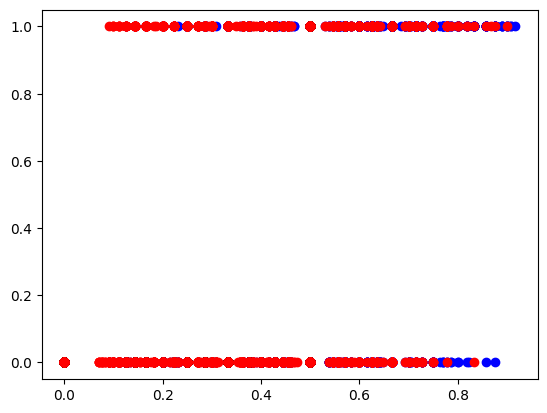

In [122]:
plt.scatter(dft_eng.word_frequency_score[:3696], dft_eng.highest_wordscore[:3696], c ="blue")
plt.scatter(dft_eng.word_frequency_score[-3693:], dft_eng.highest_wordscore[-3693:], c ="red")
plt.show()

In [120]:
dft_eng.loc[dft_eng['labels']==0]

,question_text,document_title,language,annotations,document_plaintext,document_url,answer_start,answer_text,question_text_tokenized,document_plaintext_tokenized,answer_text_tokenized,labels,word_frequency_score,highest_wordscore
3696,When was quantum field theory developed?,Quantum field theory,english,"{'answer_start': array([-1]), 'answer_text': a...","where g is the coupling constant, ta are the e...",https://en.wikipedia.org/wiki/Quantum%20field%...,[-1],[''],"['when', 'was', 'quantum', 'field', 'theory', ...","['where', 'g', 'is', 'the', 'coupling', 'const...",[],0,0.000000,0
3697,Who was the first Nobel prize winner for Liter...,List of Nobel laureates in Literature,english,"{'answer_start': array([-1]), 'answer_text': a...",Rabindranath Tagore (Nobel Prize in Literature...,https://en.wikipedia.org/wiki/List%20of%20Nobe...,[-1],[''],"['who', 'was', 'the', 'first', 'nobel', 'prize...","['rabindranath', 'tagore', '(', 'nobel', 'priz...",[],0,0.300000,1
3698,When is the dialectical method used?,Dialectic,english,"{'answer_start': array([-1]), 'answer_text': a...","As an example, Hegel mentions the states of ag...",https://en.wikipedia.org/wiki/Dialectic,[-1],[''],"['when', 'is', 'the', 'dialectical', 'method',...","['as', 'an', 'example', ',', 'hegel', 'mention...",[],0,0.285714,0
3699,Who invented Hangul?,Origin of Hangul,english,"{'answer_start': array([-1]), 'answer_text': a...",\n\nCS1 maint: extra text: editors list (link)...,https://en.wikipedia.org/wiki/Origin%20of%20Ha...,[-1],[''],"['who', 'invented', 'hangul', '?']","['cs1', 'maint', ':', 'extra', 'text', ':', 'e...",[],0,0.000000,0
3700,What do Grasshoppers eat?,Grasshopper,english,"{'answer_start': array([-1]), 'answer_text': a...","(Order including grasshoppers, locusts, cricke...",https://en.wikipedia.org/wiki/Grasshopper,[-1],[''],"['what', 'do', 'grasshoppers', 'eat', '?']","['(', 'order', 'including', 'grasshoppers', ',...",[],0,0.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,What was Neil Brooks' fastest recorded time?,Swimming at the 1980 Summer Olympics – Men's 4...,english,"{'answer_start': array([-1]), 'answer_text': a...",The medley relay was scheduled in the Olympisk...,https://en.wikipedia.org/wiki/Swimming%20at%20...,[-1],[''],"['what', 'was', 'neil', 'brooks', ""'"", 'fastes...","['the', 'medley', 'relay', 'was', 'scheduled',...",[],0,0.444444,1
7385,Who are the three most important eastern philo...,Eastern philosophy,english,"{'answer_start': array([-1]), 'answer_text': a...",Sāmkhya is a dualist philosophical tradition b...,https://en.wikipedia.org/wiki/Eastern%20philos...,[-1],[''],"['who', 'are', 'the', 'three', 'most', 'import...","['sāmkhya', 'is', 'a', 'dualist', 'philosophic...",[],0,0.222222,0
7386,Who was costume designer for the first Star Wa...,John Mollo,english,"{'answer_start': array([-1]), 'answer_text': a...",Mollo was surprised by the success of Star War...,https://en.wikipedia.org/wiki/John%20Mollo,[-1],[''],"['who', 'was', 'costume', 'designer', 'for', '...","['mollo', 'was', 'surprised', 'by', 'the', 'su...",[],0,0.545455,0
7387,Who developed the first thermonuclear weapon?,History of nuclear weapons,english,"{'answer_start': array([-1]), 'answer_text': a...","In the end, President Truman made the final de...",https://en.wikipedia.org/wiki/History%20of%20n...,[-1],[''],"['who', 'developed', 'the', 'first', 'thermonu...","['in', 'the', 'end', ',', 'president', 'truman...",[],0,0.285714,0


In [126]:
len(dft_eng.loc[(dft_eng['highest_wordscore']!=0)&((dft_eng['labels']==1))])/3696

0.5560064935064936

In [127]:
len(dft_eng.loc[(dft_eng['highest_wordscore']==0)&((dft_eng['labels']==0))])/3693

0.7376116978066612

In [130]:
len(dft_eng.loc[(dft_eng['highest_wordscore']==0)])

4365

In [131]:
len(dft_eng)

7389

In [165]:
clf = LogisticRegression(random_state=0).fit(dft_eng[['word_frequency_score','highest_wordscore']].to_numpy(),dft_eng.labels.values)
pred = clf.predict(dfv_eng[['word_frequency_score','highest_wordscore']].to_numpy())
accuracy_score(pred, dfv_eng.labels.values)

0.6757575757575758

In [154]:
dfv_eng

,question_text,document_title,language,annotations,document_plaintext,document_url,answer_start,answer_text,question_text_tokenized,document_plaintext_tokenized,answer_text_tokenized,labels,word_frequency_score,highest_wordscore
0,What is a way to increase your wound healing s...,Wound healing,english,"{'answer_start': array([51]), 'answer_text': a...",Wound care encourages and speeds wound healing...,https://en.wikipedia.org/wiki/Wound%20healing,[51],['cleaning and protection from reinjury or inf...,"['what', 'is', 'a', 'way', 'to', 'increase', '...","['wound', 'care', 'encourages', 'and', 'speeds...","['cleaning', 'and', 'protection', 'from', 'rei...",1,0.272727,0
1,Who founded the Burntisland Shipbuilding Company?,Burntisland Shipbuilding Company,english,"{'answer_start': array([0]), 'answer_text': ar...",Brothers Amos and Wilfrid Ayre founded Burntis...,https://en.wikipedia.org/wiki/Burntisland%20Sh...,[0],['Brothers Amos and Wilfrid Ayre'],"['who', 'founded', 'the', 'burntisland', 'ship...","['brothers', 'amos', 'and', 'wilfrid', 'ayre',...","['brothers', 'amos', 'and', 'wilfrid', 'ayre']",1,0.571429,0
2,What is the surface area of the human cortex?,Cerebral cortex,english,"{'answer_start': array([295]), 'answer_text': ...","For species of mammals, larger brains (in abso...",https://en.wikipedia.org/wiki/Cerebral%20cortex,[295],['2.3–2.8mm'],"['what', 'is', 'the', 'surface', 'area', 'of',...","['for', 'species', 'of', 'mammals', ',', 'larg...",['2.3–2.8mm'],1,0.600000,1
3,When did the case of R (Factortame Ltd) v Secr...,R (Factortame Ltd) v Secretary of State for Tr...,english,"{'answer_start': array([352]), 'answer_text': ...","As from 31 March 1989, fishing vessel registra...",https://en.wikipedia.org/wiki/R%20%28Factortam...,[352],['December 1988'],"['when', 'did', 'the', 'case', 'of', 'r', '(',...","['as', 'from', '31', 'march', '1989', ',', 'fi...","['december', '1988']",1,0.263158,0
4,When was Quezon City founded?,Quezon City,english,"{'answer_start': array([32]), 'answer_text': a...","When Quezon City was created in 1939, the foll...",https://en.wikipedia.org/wiki/Quezon%20City,[32],['1939'],"['when', 'was', 'quezon', 'city', 'founded', '?']","['when', 'quezon', 'city', 'was', 'created', '...",['1939'],1,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,What's the average income in West Virginia?,List of West Virginia locations by per capita ...,english,"{'answer_start': array([-1]), 'answer_text': a...",Note: County Data is from the 2011–2015 Americ...,https://en.wikipedia.org/wiki/List%20of%20West...,[-1],[''],"['what', ""'s"", 'the', 'average', 'income', 'in...","['note', ':', 'county', 'data', 'is', 'from', ...",[],0,0.111111,0
986,How often do LSAT tests take place?,Law School Admission Test,english,"{'answer_start': array([-1]), 'answer_text': a...",A recent controversy surrounding the LSAT was ...,https://en.wikipedia.org/wiki/Law%20School%20A...,[-1],[''],"['how', 'often', 'do', 'lsat', 'tests', 'take'...","['a', 'recent', 'controversy', 'surrounding', ...",[],0,0.125000,0
987,How much does a bushel of barley weigh?,Bushel,english,"{'answer_start': array([-1]), 'answer_text': a...",\nThe Spanish bushel (fanega) was used as a me...,https://en.wikipedia.org/wiki/Bushel,[-1],[''],"['how', 'much', 'does', 'a', 'bushel', 'of', '...","['the', 'spanish', 'bushel', '(', 'fanega', ')...",[],0,0.333333,0
988,What is the most common first word by babies?,Vocabulary development,english,"{'answer_start': array([-1]), 'answer_text': a...","Social pragmatic theories, also in contrast to...",https://en.wikipedia.org/wiki/Vocabulary%20dev...,[-1],[''],"['what', 'is', 'the', 'most', 'common', 'first...","['social', 'pragmatic', 'theories', ',', 'also...",[],0,0.300000,0


In [177]:
dft_eng.question_text_tokenized

0       ['when', 'was', 'quantum', 'field', 'theory', ...
1       ['who', 'was', 'the', 'first', 'nobel', 'prize...
2       ['when', 'is', 'the', 'dialectical', 'method',...
3                      ['who', 'invented', 'hangul', '?']
4              ['what', 'do', 'grasshoppers', 'eat', '?']
                              ...                        
7384    ['what', 'was', 'neil', 'brooks', "'", 'fastes...
7385    ['who', 'are', 'the', 'three', 'most', 'import...
7386    ['who', 'was', 'costume', 'designer', 'for', '...
7387    ['who', 'developed', 'the', 'first', 'thermonu...
7388    ['what', 'is', 'the', 'population', 'of', 'mah...
Name: question_text_tokenized, Length: 7389, dtype: object

In [148]:
dft_eng.word_frequency_score.values.reshape(-1, 1)

array([[0.57142857],
       [0.7       ],
       [0.57142857],
       ...,
       [0.54545455],
       [0.28571429],
       [0.33333333]])

In [149]:
dft_eng[['word_frequency_score','highest_wordscore']].to_numpy()

array([[0.57142857, 0.        ],
       [0.7       , 1.        ],
       [0.57142857, 0.        ],
       ...,
       [0.54545455, 0.        ],
       [0.28571429, 0.        ],
       [0.33333333, 0.        ]])

In [169]:
eval(dft_eng.question_text_tokenized.values[0])

['when', 'was', 'quantum', 'field', 'theory', 'developed', '?']

In [172]:
eng_word_count = word_count.loc[word_count['language']=='english']

In [173]:
eng_word_count.loc[eng_word_count['word'].isin(eval(dft_eng.question_text_tokenized.values[0]))]

,word,counters,norm,language
61887,was,7649.0,0.854742,english
61937,when,929.0,0.982375,english
62072,developed,309.0,0.994150,english
62216,field,205.0,0.996125,english
62349,theory,144.0,0.997284,english
63438,?,51.0,0.999050,english
66265,quantum,17.0,0.999696,english


In [174]:
eng_word_count.loc[eng_word_count['word'].isin(eval(dft_eng.document_plaintext_tokenized.values[0]))]

,word,counters,norm,language
61876,the,52652.0,0.000000,english
61877,",",43098.0,0.181459,english
61878,of,26119.0,0.503941,english
61883,],13028.0,0.752578,english
61884,[,13025.0,0.752635,english
61887,was,7649.0,0.854742,english
61889,as,6548.0,0.875653,english
61894,with,4713.0,0.910505,english
61938,known,915.0,0.982640,english
61955,only,740.0,0.985964,english
